In [ ]:
#To avoid scatterplots and create histogram plots. I can create new columns in each dataframe, (PPG per Salary) and graph the distribution with a histogram. 

#MAIN QUESTIONS  (For finding outliers, can do so visually, or use skicit library to find residuals and sort accordingly. )
    #Which players are most efficient per dollar
    #Which players offer the best usage:salary ratio. 
    #Best Shooters/Defensive/Offensive/Passers Per dollar. 
    #Which players are the most overpaid/underpaid per overall performance. 
    #Which Positions provide the most impact per dollar


#After Analysis
    #Decide Most Vital statistics to determine value and calculate a new metric based on salary and these performance stats. 

'\nEDA\n    #Look at trends in each individual dataframe. Firstly look at the Per Game dataframe, looking at basic statistics\n    #such as points, fg percentage, ect, and compare with other factors such as age, salary, MP, ect. Repeat with all 3 dataframes\n    #Then look at relationships between variables from different dataframes. Could use merge to create new tables with select statistics from each one\n\n\n\n#Metrics to inspect\n    #BPM per Dollar M\n    #Usage per Dollar\n    #Win Share per Dollar\n\n\n#MAIN QUESTIONS  (For finding outliers, can do so visually, or use skicit library to find residuals and sort accordingly. )\n    #Which players are most efficient per dollar\n    #Which players offer the best usage:salary ratio. \n    #Best Shooters/Defensive/Offensive/Passers Per dollar. \n    #Which players are the most overpaid/underpaid per overall performance. \n    #Which Positions provide the most impact per dollar\n\n\n#After Analysis\n    #Decide Most Vital statistics to 

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
PGSal = pd.read_csv('..\Player_Data\Cleaned_Player_Data\Cleaned_PG_Sal.csv', index_col = 0)
AdvancedSal = pd.read_csv('..\Player_Data\Cleaned_Player_Data\Cleaned_Advanced_Sal.csv', index_col = 0)

'\nBoth the Salary and Points Per Game distributions have similar shapes. They are both skewed to the right and have longer tails. There are more players that are are on 10M dollar \ncontracts and smaller than the big contracts. The points per game distribution is a little less skewed as the median is closer to the middle of the distribution than the salary \ndistribution. \n\n'

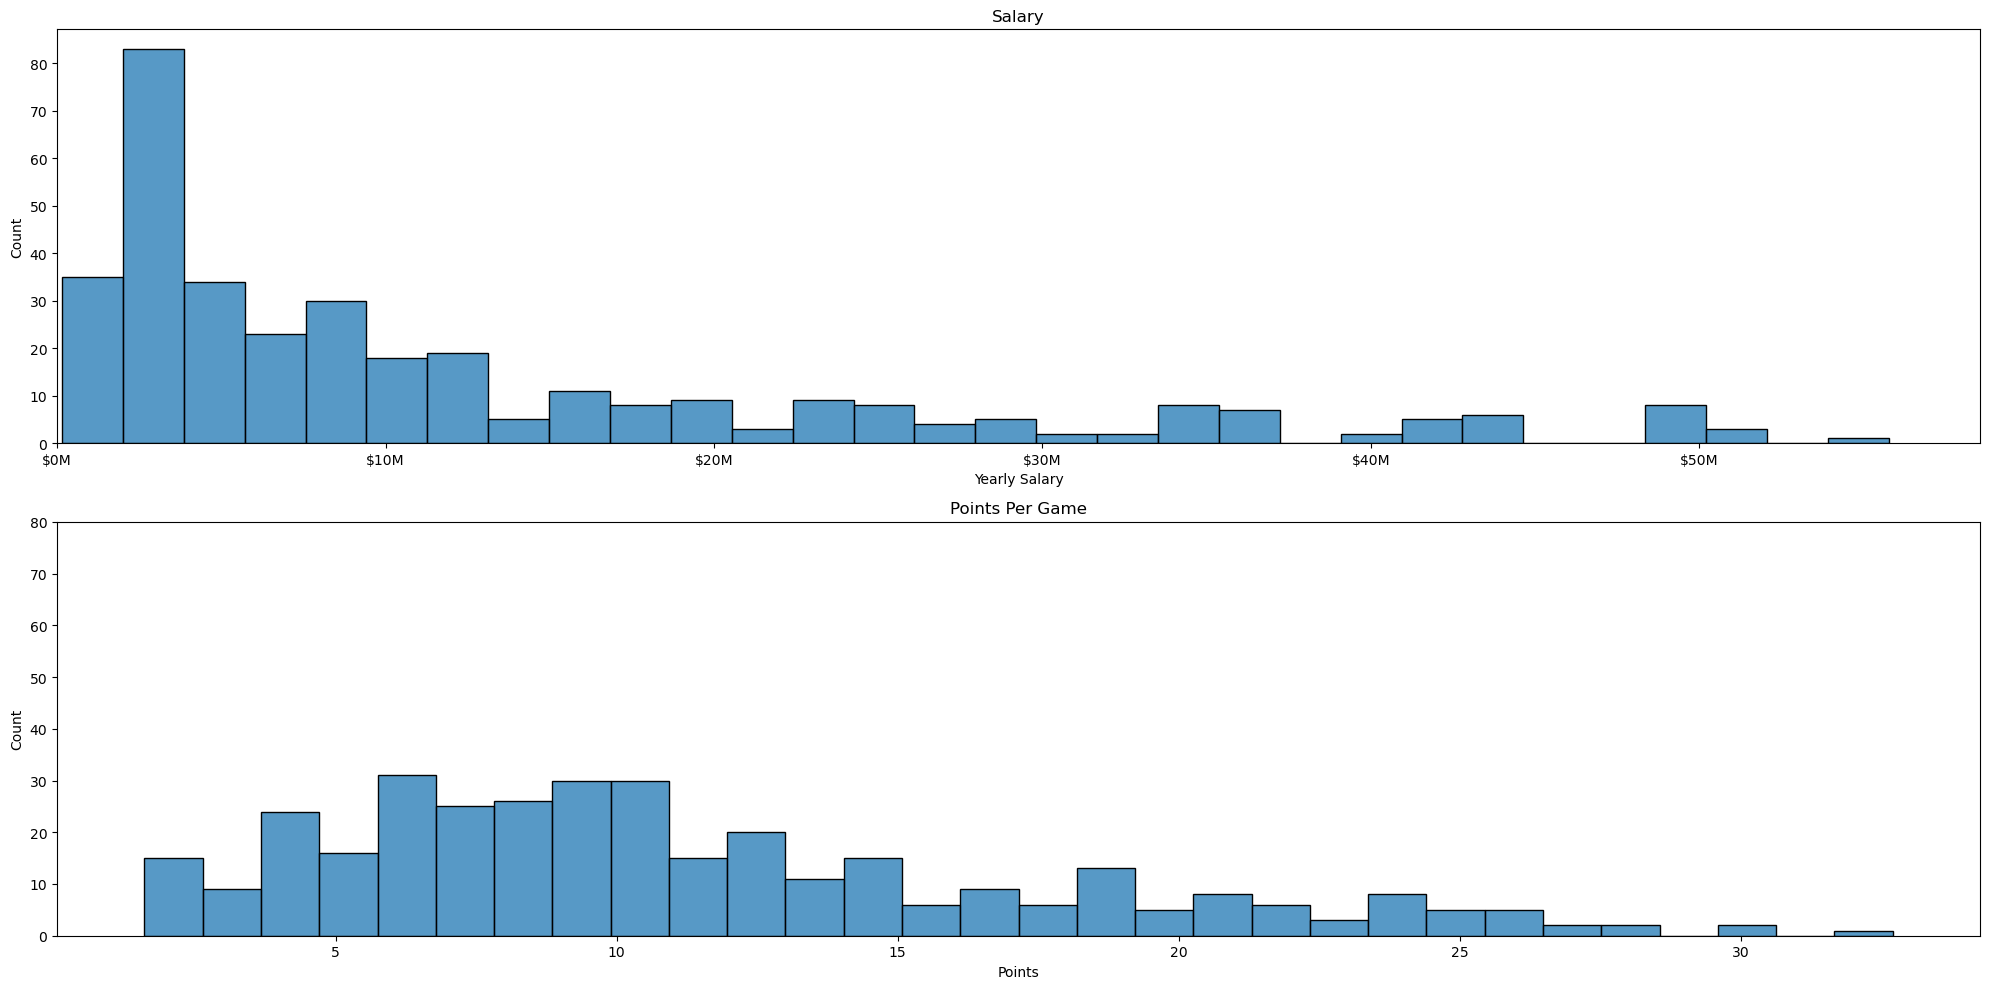

In [93]:
fig, ax = plt.subplots(2,1, figsize = (20,10))
sns.histplot(PGSal['YearSalaryM'], bins = 30, ax = ax[0])
sns.histplot(PGSal['PTS'], bins = 30,ax = ax[1])
ax[1].set_ylim(0,80)
ax[1].set_title('Points Per Game')
ax[1].set_xlabel('Points')

ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x)}M'))
ax[0].set_title('Salary')
ax[0].set_xlabel('Yearly Salary')
ax[0].set_xlim(0,)

plt.tight_layout()

'''
Both the Salary and Points Per Game distributions have similar shapes. They are both skewed to the right and have longer tails. There are more players that are are on 10M dollar 
contracts and smaller than the big contracts. The points per game distribution is a little less skewed as the median is closer to the middle of the distribution than the salary 
distribution. 

'''

'\nFrom the graphs of Points per Salary, Assists per Salary, and Total Rebounds per salary, it seems that the first graph has the tightest spread to a positive linear relationship\nThis shows that for these players, the points per game is a heavily weighted factor for the amount that a team will pay them, a heavier factor than assists or rebounds.\nSince the other two have less clear trends and higher residuals (spread). \n'

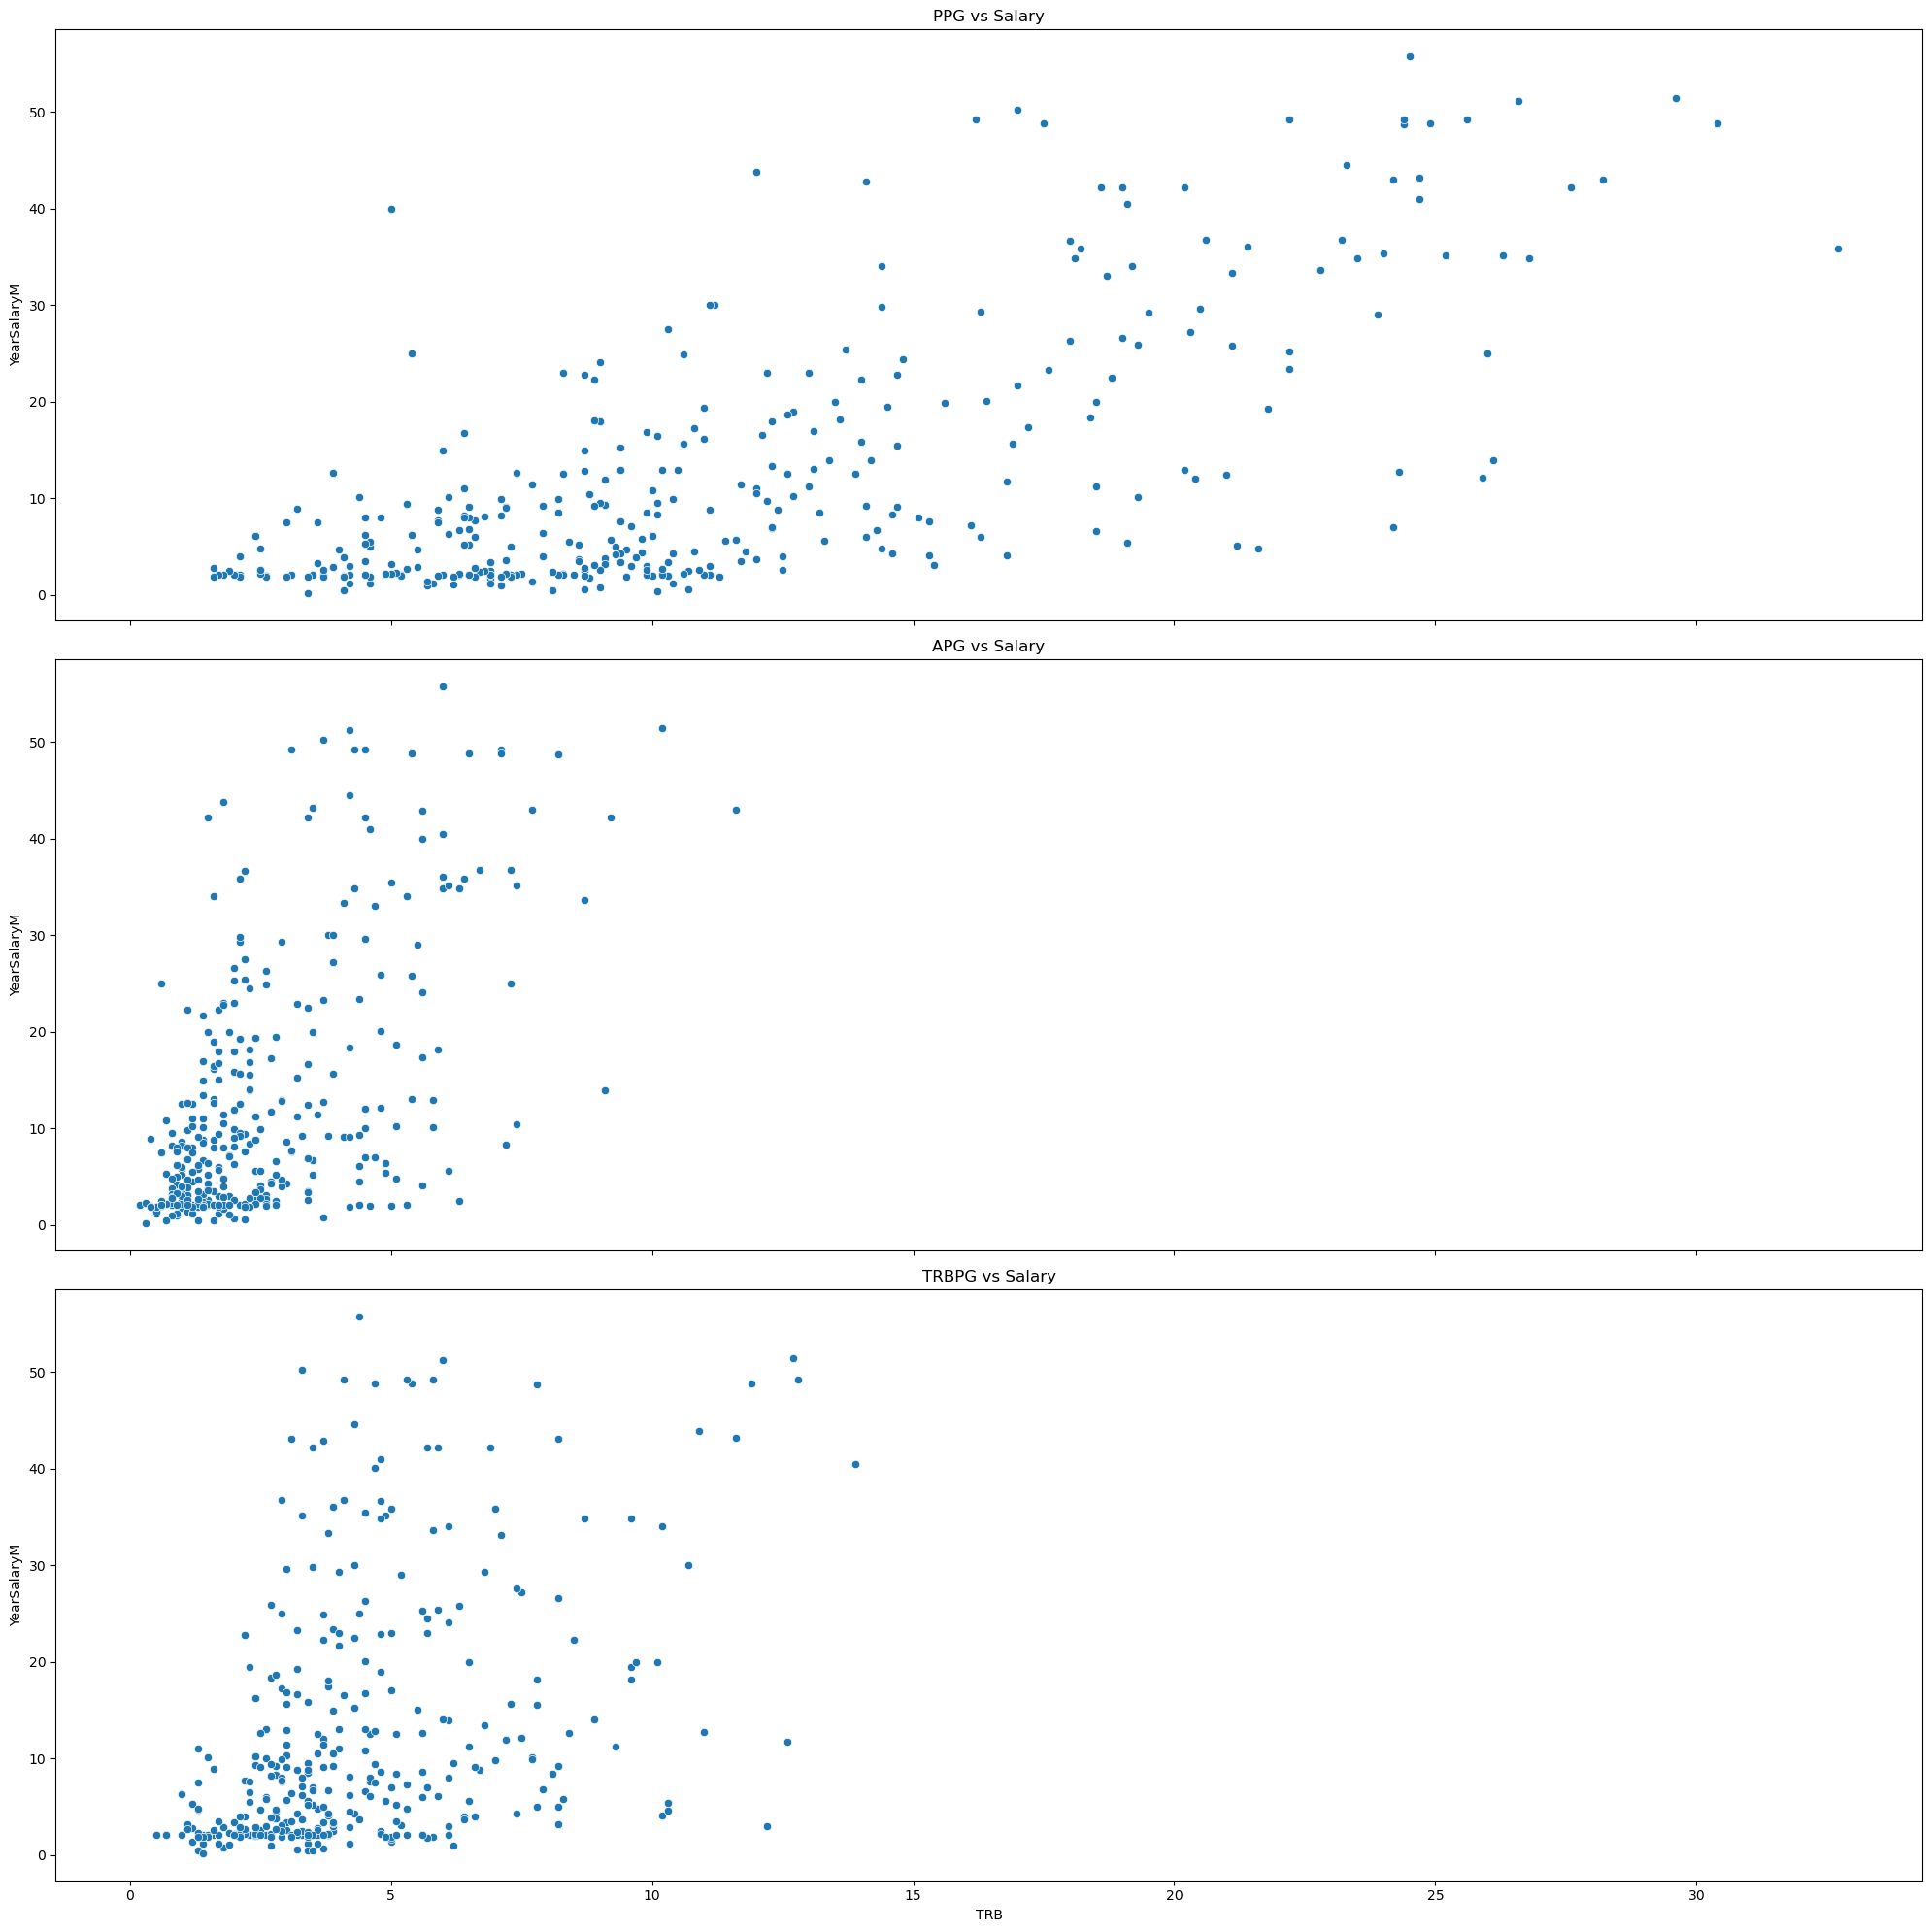

In [94]:
fig, ax = plt.subplots(3,1, figsize = (20,20), sharex = True)
sns.scatterplot(data = PGSal, x = 'PTS', y = 'YearSalaryM', ax = ax[0])
ax[0].set_title('PPG vs Salary')
sns.scatterplot(data = PGSal, x = 'AST', y = 'YearSalaryM', ax = ax[1])
ax[1].set_title('APG vs Salary')
sns.scatterplot(data = PGSal, x = 'TRB', y = 'YearSalaryM', ax = ax[2])
ax[2].set_title('TRBPG vs Salary')

plt.tight_layout()

'''
From the graphs of Points per Salary, Assists per Salary, and Total Rebounds per salary, it seems that the first graph has the tightest spread to a positive linear relationship
This shows that for these players, the points per game is a heavily weighted factor for the amount that a team will pay them, a heavier factor than assists or rebounds.
Since the other two have less clear trends and higher residuals (spread). 
'''

<Axes: xlabel='Pos', ylabel='YearSalaryM'>

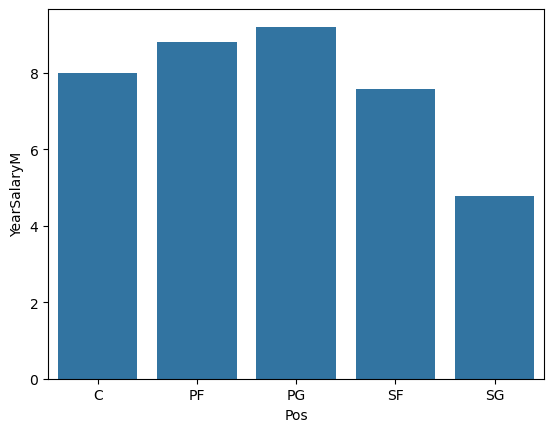

In [112]:
#Position vs Salary
PGSal.groupby(by = 'Pos')['YearSalaryM'].median().reset_index()
sns.barplot(data = PGSal.groupby(by = 'Pos')['YearSalaryM'].median().reset_index(), x = 'Pos', y = 'YearSalaryM')


<Axes: xlabel='STL', ylabel='YearSalaryM'>

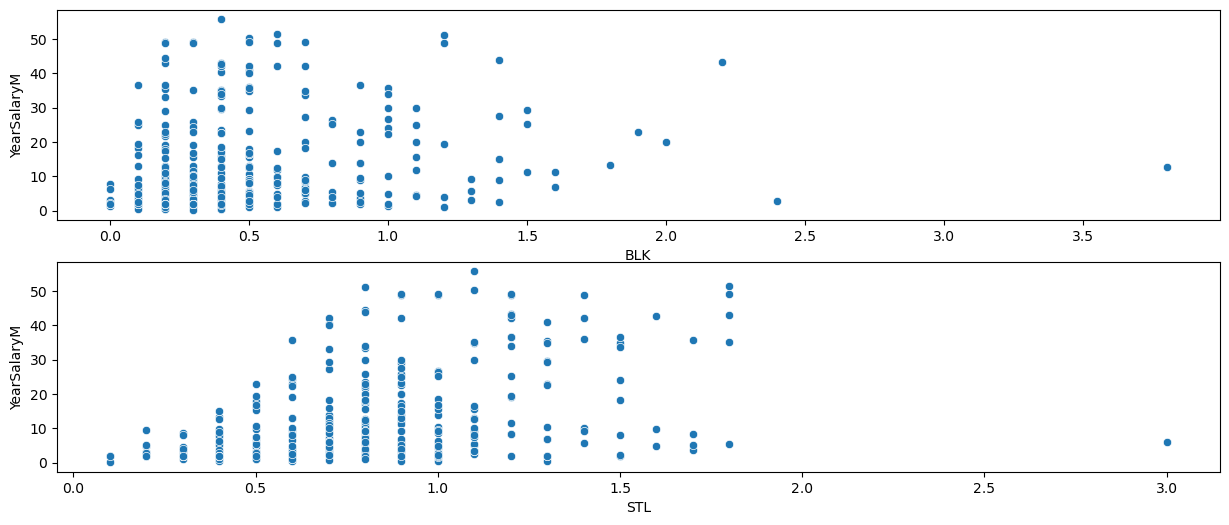

In [ ]:
#Steals and Blocks and Salary Analysis
fig, ax = plt.subplots(2,1,figsize = (20,10))
sns.scatterplot(data = PGSal, x = 'BLK', y = 'YearSalaryM', ax = ax[0])
sns.scatterplot(data = PGSal, x = 'STL', y = 'YearSalaryM', ax = ax[1])

'''
The first graph of Blocks vs Yearly Salary, is less skewed than previous distribution but still has a slight right skew. One reason for a more normal distribution could be 
because of positional variance in salary and contributions. Bigs are more likely to get blocks than gaurds and bigs might tend to get paid less than gaurds. This also
applies to the steal distribution. The steal distribution is somewhat normal with a slight skew to the left. This could reflect the opposite side of the previous reason. 
Gaurds are more likely to get steals an might be getting paid more than bigs. 
'''

In [96]:
PGSal.head(10)

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,YearSalaryM
0,Shai Gilgeous-Alexander,26,OKC,PG,76,76,34.2,11.3,21.8,0.519,2.1,5.7,0.375,9.2,16.1,0.571,0.569,7.9,8.8,0.898,0.9,4.1,5.0,6.4,1.7,1.0,2.4,2.2,32.7,35.860
1,Giannis Antetokounmpo,30,MIL,PF,67,67,34.2,11.8,19.7,0.601,0.2,0.9,0.222,11.6,18.7,0.620,0.607,6.5,10.6,0.617,2.2,9.7,11.9,6.5,0.9,1.2,3.1,2.3,30.4,48.788
2,Nikola Jokić,29,DEN,C,70,70,36.7,11.2,19.5,0.576,2.0,4.7,0.417,9.3,14.8,0.627,0.627,5.2,6.4,0.800,2.9,9.9,12.7,10.2,1.8,0.6,3.3,2.3,29.6,51.416
3,Luka Dončić,25,2TM,PG,50,50,35.4,9.2,20.5,0.450,3.5,9.6,0.368,5.7,10.9,0.522,0.536,6.2,7.9,0.782,0.8,7.4,8.2,7.7,1.8,0.4,3.6,2.5,28.2,43.032
4,Anthony Edwards,23,MIN,SG,79,79,36.3,9.1,20.4,0.447,4.1,10.3,0.395,5.1,10.1,0.501,0.547,5.3,6.3,0.837,0.8,4.9,5.7,4.5,1.2,0.6,3.2,1.9,27.6,42.176
5,Jayson Tatum,26,BOS,PF,72,72,36.4,9.2,20.3,0.452,3.5,10.1,0.343,5.7,10.2,0.559,0.537,5.0,6.1,0.814,0.7,8.0,8.7,6.0,1.1,0.5,2.9,2.2,26.8,34.848
6,Kevin Durant,36,PHO,PF,62,62,36.5,9.5,18.1,0.527,2.6,6.0,0.430,7.0,12.1,0.574,0.598,4.9,5.8,0.839,0.4,5.7,6.0,4.2,0.8,1.2,3.1,1.7,26.6,51.179
7,Tyrese Maxey,24,PHI,PG,52,52,37.7,9.2,21.0,0.437,3.1,9.2,0.337,6.1,11.8,0.515,0.511,4.9,5.6,0.879,0.3,3.1,3.3,6.1,1.8,0.4,2.4,2.2,26.3,35.147
8,Cade Cunningham,23,DET,PG,70,70,35.0,9.8,20.8,0.469,2.1,6.0,0.356,7.6,14.8,0.515,0.521,4.5,5.3,0.846,0.8,5.3,6.1,9.1,1.0,0.8,4.4,2.8,26.1,13.941
9,Jalen Brunson,28,NYK,PG,65,65,35.4,9.0,18.5,0.488,2.3,6.1,0.383,6.7,12.4,0.539,0.551,5.7,6.9,0.821,0.4,2.5,2.9,7.3,0.9,0.1,2.5,2.1,26.0,24.960


In [97]:
AdvancedSal.head(10)

,Player,Age,Team,Pos,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,YearSalaryM
0,Mikal Bridges,28,NYK,SF,82,82,3036,14.0,0.585,0.391,0.100,2.7,7.0,4.9,14.4,1.2,1.3,9.7,19.6,3.7,2.0,5.7,0.090,0.4,-0.9,-0.5,1.2,23.300
1,Josh Hart,29,NYK,SG,77,77,2897,16.5,0.611,0.327,0.266,6.4,22.6,14.6,20.7,2.0,0.9,15.5,15.3,5.4,3.8,9.2,0.153,1.1,1.8,2.8,3.6,18.144
2,Anthony Edwards,23,MIN,SG,79,79,2871,20.1,0.595,0.503,0.308,2.4,14.8,8.7,20.9,1.6,1.7,12.0,31.4,4.6,3.8,8.4,0.140,4.4,0.0,4.3,4.6,42.176
3,Devin Booker,28,PHO,SG,75,75,2795,19.3,0.589,0.388,0.340,3.1,8.9,6.1,30.6,1.2,0.5,11.9,29.3,6.1,0.3,6.4,0.111,2.8,-2.4,0.4,1.7,49.206
4,James Harden,35,LAC,PG,79,79,2789,20.0,0.582,0.516,0.446,2.3,16.1,9.3,36.8,2.1,2.0,18.0,29.6,4.0,4.3,8.3,0.143,3.5,0.8,4.3,4.4,33.654
5,DeMar DeRozan,35,SAC,SF,77,77,2768,17.7,0.569,0.196,0.337,2.0,10.1,6.0,18.7,1.1,1.1,6.5,25.0,5.7,1.4,7.1,0.123,1.2,-1.2,-0.1,1.3,23.400
6,Trae Young,26,ATL,PG,76,76,2739,18.3,0.567,0.467,0.408,1.4,8.2,4.7,46.4,1.6,0.4,17.9,29.6,4.4,1.3,5.7,0.100,3.3,-2.7,0.5,1.7,43.032
7,Tyler Herro,25,MIA,SG,77,77,2725,19.7,0.605,0.486,0.237,1.4,14.6,8.1,26.2,1.3,0.6,11.5,28.0,4.7,2.7,7.4,0.131,3.8,-0.7,3.1,3.5,29.000
8,OG Anunoby,27,NYK,PF,74,74,2706,15.4,0.591,0.448,0.220,4.2,11.0,7.6,8.5,2.0,2.2,8.3,19.7,3.7,2.8,6.5,0.116,0.7,0.1,0.7,1.9,36.638
9,Jalen Green,22,HOU,SG,82,82,2697,15.1,0.544,0.460,0.234,1.7,13.4,7.4,16.0,1.3,0.9,11.4,27.3,1.9,3.2,5.1,0.092,1.1,-0.5,0.5,1.7,12.483


In [98]:
#How are shooters valued.
#Filter for high volume 3 point shooters. Players with a 3PAr above 0.5 (Majority of shots are 3 pointers) and a high 3p%
    #Difficult because 3PAr is only in advanced dataframe, and rest of 3 point metrics are in the pg dataframe. Might need to merge the two: Find some solution for this
#Compare distribution of high volume shooters ppg vs Salary with entire league ppg vs Salary. 

<Axes: xlabel='BPM', ylabel='YearSalaryM'>

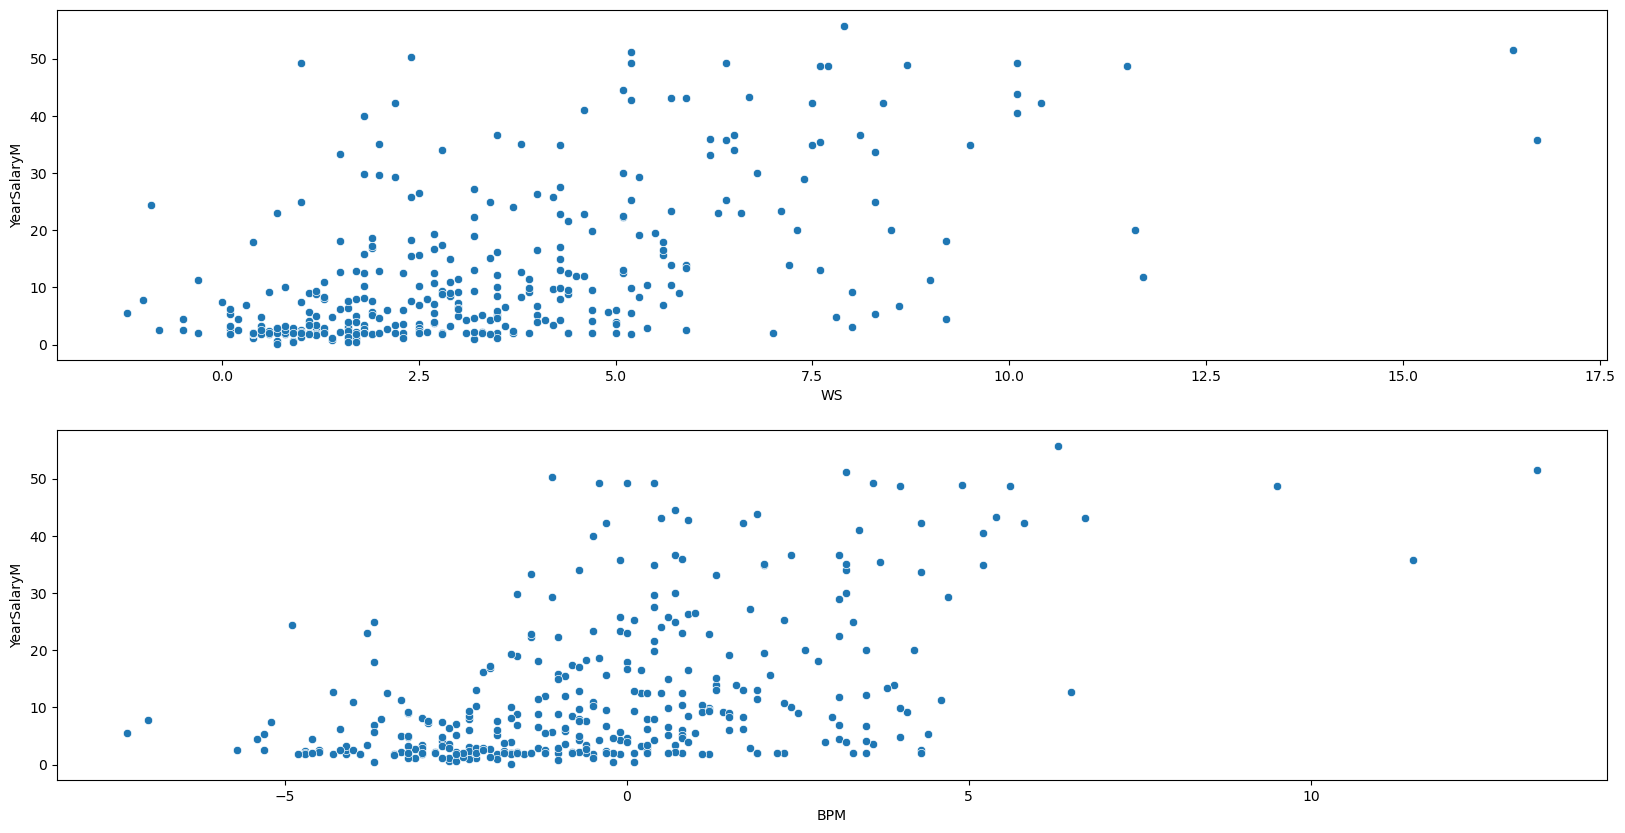

In [118]:
fig, ax = plt.subplots(2,1, figsize = (20,10))
sns.scatterplot(data = AdvancedSal, x = 'WS', y = 'YearSalaryM', ax = ax[0])
sns.scatterplot(data = AdvancedSal, x = 'BPM',y = 'YearSalaryM', ax = ax[1] )